# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [17]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [18]:
### To start off let's do a basic data summary.

print (train.keys())
    
# TODO: number of training examples
n_train = len(train['features'])

# TODO: number of testing examples
n_test = len(test['features'])

# TODO: what's the shape of an image?
# First image in the set
image_shape = train['features'].shape[1:3]

# TODO: how many classes are in the dataset
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

dict_keys(['coords', 'labels', 'sizes', 'features'])
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


  2%|▏         | 2/100 [00:00<00:06, 15.16it/s]

Sampling from the German Traffic Signs Data Set:


100%|██████████| 100/100 [00:27<00:00,  2.13it/s]


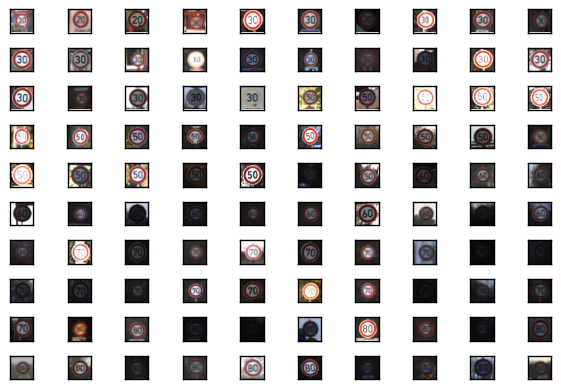

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import tensorflow as tf
from tqdm import tqdm

print('Sampling from the German Traffic Signs Data Set:')

n = 0

def addsubplot(i, feature):
    plt.subplot(10,10,i)
    plt.xticks(()); plt.yticks(());
    plt.tight_layout()
    plt.imshow(feature)

for feature in tqdm(range(0,100)):
    feature = train['features'][n*100]
    plt.figure(1)
    addsubplot(n+1, feature)
    n += 1

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._


**Answer:**

First, I prove out a greyscale conversion method using the same images from the visualization section above. This is a validation step used to quickly test code. I used the cv2 library and the method from Project 1 to perform the conversion:

100%|██████████| 100/100 [00:25<00:00,  2.56it/s]


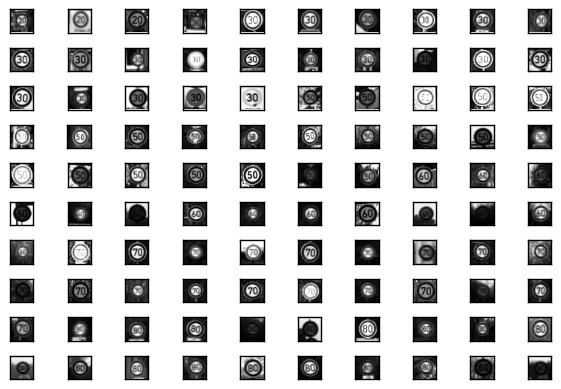

In [20]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

train_features = train['features']
train_labels = train['labels']
valid_features = train['features']
valid_labels = train['labels']
test_features = test['features']
test_labels = test['labels']

#Variables:
n = 0

#Functions:
def greyscale(image_data):
    return cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
    
def addsubplot_grey(i, grey_feature):
    plt.subplot(10,10,i)
    plt.xticks(()); plt.yticks(());
    plt.tight_layout()
    plt.imshow(grey_feature, cmap='gray')

#Call:
for n in tqdm(range(0,100)):
    feature = greyscale(train['features'][n*100])
    plt.figure(2)
    addsubplot_grey(n+1, feature)

In [21]:
#1. Normalize greyscale images:
def normalize_greyscale(image_data):
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + (((image_data - greyscale_min) * (b - a)) / (greyscale_max - greyscale_min))

#Call:
def all_grey(features):
    grey_features = []
    #loop through all features:
    for feature in tqdm(features):
        grey_features.append(normalize_greyscale(greyscale(feature)))
    return np.array(grey_features)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def OHE_labels(Y_t, N_classes):
    OHE = OneHotEncoder()
    
    Y_ohc = OHE.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_t.reshape(-1, 1)).toarray()
    
    return Y_labels

#2. Apply One-Hot Encoding to labels:
OHE_train_labels = OHE_labels(train_labels, 43)
OHE_test_labels = OHE_labels(test_labels, 43)
print('Labels One-Hot Encoded.')

#3. Convert labels to Float 32 for multiplying within TensorFlow:
OHE_train_labels = OHE_train_labels.astype(np.float32)
OHE_test_labels = OHE_test_labels.astype(np.float32)
print('Conversion to Float 32 complete.')

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Starting from the pickled data set, I queried for the total number of training and test features using print statements:

In [ ]:
print('There are %s images in the training set.' % len(train['features']))
print('There are %s images in the testing set.' % len(test['features']))

Once I preprocessed the data, the next step was to create a validation set as a subset of the training data using the train_test_split function from sklearn:

In [ ]:
#Randomize and split the training and validation sets:

train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    OHE_train_labels,
    test_size=0.05,
    random_state=832289)
print('Training and validation sets split.')

In [ ]:
print('Validation Images: %s' % len(valid_features))
print('Training Images: %s' % len(train_features))
print('Test Images: %s' % len(test_features))

In [ ]:
print(train_features.shape)
train_features = all_grey(train_features)
print(train_features.shape)

print(valid_features.shape)
valid_features = all_grey(valid_features)
print(valid_features.shape)

print(test_features.shape)
test_features = all_grey(test_features)
print(test_features.shape)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
import tensorflow as tf

n_input = 1024
n_classes = 43

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    #'layer_4': tf.Variable(tf.truncated_normal(
        #[5, 5, layer_width['layer_3'], layer_width['layer_4']])),
    #'layer_5': tf.Variable(tf.truncated_normal(
        #[5, 5, layer_width['layer_4'], layer_width['layer_5']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes])),
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    #'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    #'layer_5': tf.Variable(tf.zeros(layer_width['layer_5'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    #Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
    x, 
    ksize=[1, k, k, 1],
    strides=[1, k, k , 1],
    padding='SAME')

#Create model
def conv_net(x, weights, biases):
    #Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)
    
    #Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)
    
    #Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3)
    
    #Layer 4
    #conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    #conv4 = maxpool2d(conv4)
    
    #Layer 5
    #conv5 = conv2d(conv4, weights['layer_5'], biases['layer_5'])
    #conv5 = maxpool2d(conv5)
    
    #Fully Connected Layer
    fc1 = tf.reshape(conv3, [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)
    
    #Output Layer - Class Prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [ ]:
import math

#Parameters
learning_rate = 0.001
batch_size = 512
training_epochs = 30

#tf Graph input
x = tf.placeholder("float", [None, 32, 32])
image = tf.reshape(x, [-1, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

def batches(X, y, size):
    #Number of batches includes a final "rest" batch
    #if division is not exact
    n = int(math.ceil(len(X) / size))
    for k in range(n):
        a = k * size
        b = a + size
        yield(k, X[a:b], y[a:b])
        
#x_flat = tf.reshape(x, [-1, 1024]) #where n_input is now = 32 * 32 * 1 = 1024

logits = conv_net(image, weights, biases)

#Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

#Simple version to get ith batch, i starts from 0
def getBatch(i, totalBatches, bsize):
    if i < totalBatches-1:
        X_train_b = train_features[i*bsize:(i+1)*bsize]
        y_train_b = OHE_train_labels[i*bsize:(i+1)*bsize]
    else:
        X_train_b = train_features[i*bsize:]
        y_train_b = OHE_train_labels[i*bsize:]
    return X_train_b, y_train_b

#Initialize all variables
init = tf.initialize_all_variables()

#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Training cycle
    for epoch in range(training_epochs):
        total_batch = int(len(train_features)/batch_size)
        #Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = getBatch(i, total_batch, batch_size)
            #Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        for i in range(total_batch):
            batch_x, batch_y = getBatch(i, total_batch, batch_size)
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization finished!")
    
    #Test Model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    #Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy",
        accuracy.eval({x: test_features, y: test_labels})
    )

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I developed a convolutional network to solve this problem and preprocessed the images in greyscale to increase my accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Example Images from Google Search:


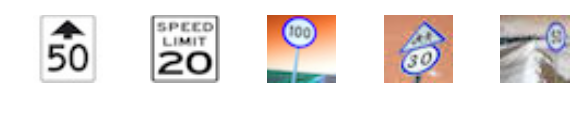

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
%matplotlib inline

print('Example Images from Google Search:')

img1 = cv2.imread('example_sign_1.png')
img2 = cv2.imread('example_sign_2.png')
img3 = cv2.imread('example_sign_3.png')
img4 = cv2.imread('example_sign_4.png')
img5 = cv2.imread('example_sign_5.png')

example_signs_array = [img1, img2, img3, img4, img5]

n = 0

def addsubplot_img(i, img):
    plt.subplot(1,5,i)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(img)
    
for img in example_signs_array:
    plt.figure(3)
    addsubplot_img(n+1, img)
    n += 1

Example Images from Google Search in Grayscale:


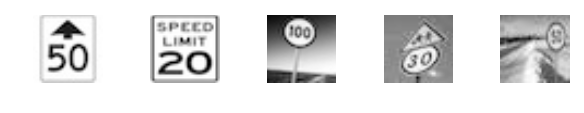

In [31]:
print('Example Images from Google Search in Grayscale:')
n = 0

def greyscale(image_data):
    return cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)

def addsubplot_img_grey(i, img):
    plt.subplot(1,5,i)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    
for img in example_signs_array:
    img = greyscale(img)
    plt.figure(4)
    addsubplot_img_grey(n+1, img)
    n += 1

In [34]:
from tqdm import tqdm

def process_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def process_norm(img):
    a = 0.1
    b = 0.9
    grey_min = 0
    grey_max = 255
    return a + (((img - grey_min) * (b - a)) / (grey_max - grey_min))

gray_example_signs_array = []
for sign in tqdm(example_signs_array):
    gray_example_signs_array.append(process_norm(process_gray(sign)).astype(np.float32))
print('Example Signs Preprocessed.')

100%|██████████| 5/5 [00:00<00:00, 7484.48it/s]

Example Signs Preprocessed.


In [ ]:
import tensorflow as tf

n_input = 1024
n_classes = 43

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    #'layer_4': tf.Variable(tf.truncated_normal(
        #[5, 5, layer_width['layer_3'], layer_width['layer_4']])),
    #'layer_5': tf.Variable(tf.truncated_normal(
        #[5, 5, layer_width['layer_4'], layer_width['layer_5']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes])),
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    #'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    #'layer_5': tf.Variable(tf.zeros(layer_width['layer_5'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    #Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
    x, 
    ksize=[1, k, k, 1],
    strides=[1, k, k , 1],
    padding='SAME')

#Create model
def conv_net(x, weights, biases):
    #Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)
    
    #Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)
    
    #Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3)
    
    #Layer 4
    #conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    #conv4 = maxpool2d(conv4)
    
    #Layer 5
    #conv5 = conv2d(conv4, weights['layer_5'], biases['layer_5'])
    #conv5 = maxpool2d(conv5)
    
    #Fully Connected Layer
    fc1 = tf.reshape(conv3, [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)
    
    #Output Layer - Class Prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [ ]:
import math

#Parameters
learning_rate = 0.001
batch_size = 512
training_epochs = 30

#tf Graph input
x = tf.placeholder("float", [None, 32, 32])
image = tf.reshape(x, [-1, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

def batches(X, y, size):
    #Number of batches includes a final "rest" batch
    #if division is not exact
    n = int(math.ceil(len(X) / size))
    for k in range(n):
        a = k * size
        b = a + size
        yield(k, X[a:b], y[a:b])
        
#x_flat = tf.reshape(x, [-1, 1024]) #where n_input is now = 32 * 32 * 1 = 1024

logits = conv_net(image, weights, biases)

#Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

#Simple version to get ith batch, i starts from 0
def getBatch(i, totalBatches, bsize):
    if i < totalBatches-1:
        X_train_b = train_features[i*bsize:(i+1)*bsize]
        y_train_b = OHE_train_labels[i*bsize:(i+1)*bsize]
    else:
        X_train_b = train_features[i*bsize:]
        y_train_b = OHE_train_labels[i*bsize:]
    return X_train_b, y_train_b

#Initialize all variables
init = tf.initialize_all_variables()

#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Training cycle
    for epoch in range(training_epochs):
        total_batch = int(len(train_features)/batch_size)
        #Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = getBatch(i, total_batch, batch_size)
            #Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        for i in range(total_batch):
            batch_x, batch_y = getBatch(i, total_batch, batch_size)
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization finished!")
    
    #Test Model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    #Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy",
        accuracy.eval({x: test_features, y: test_labels})
    )

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

Each of these images should easily be classified using the existing system, as they are each a part of one class from the csv file. One of the difficulties is the resolution of each image is relatively low, making it more difficult for the classifier to predict accurately.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.